In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
plt.style.use('ggplot')

# Wrapping LOADEST

[LOADEST](https://water.usgs.gov/software/loadest/) is a FORTRAN program from the USGS that implements a variety of linear regression models for estimating riverine fluxes. The package includes algorithms designed to handle missing & censored data and multicollinearity, as well as providing tools for automatic model selection based on the AIC (from within a set of nine pre-defined models). The models included by default have been widely tested and applied, and are capable of accounting for seasonal variations and/or step changes. Full documentation for the original program is [here](https://pubs.usgs.gov/tm/2005/tm4A5/pdf/508final.pdf) and an update is [here](https://water.usgs.gov/software/loadest/doc/loadest_update.pdf) for the current version (released in 2013).

LOADEST includes some powerful algorithms, but it lacks visualisation capabiltities and the input & output files are fiddly to work with. This notebook has four main aims:

 1. Read water chemistry and hydrology data directly from the RESA2 database and reformat it to create input files for LOADEST <br><br>
 
 2. Run LOADEST automatically via the command line (with predefined parameters for e.g. model selection and the handling of LOD values) <br><br>
 
 3. Read the outputs produced by LOADEST and create diagnostic plots for model evaluation <br><br>
 
 4. Reformat the predicted fluxes from LOADEST to create something more useful for MARTINI
 
**28/09/2018**

Initially, I just want to write some code to work with the LOADEST example applications. Application 3 (Section 4.3 of the [LOADEST documentation](https://pubs.usgs.gov/tm/2005/tm4A5/pdf/508final.pdf)) seems most relevant to MARTINI, so I'll begin by writing code to run this example and read the outputs.

## 1. Running LOADEST from Python

I have copied the example data for Application 3 to

    ...\MARTINI\Load_Estimation\loadest
    
together with a copy of `'loadest.exe'`. Running LOADEST can be achieved very simply using the `'subprocess'` module.

In [12]:
# Run LOADEST
loadest_dir = r'C:\Data\James_Work\Staff\Phil_W\MARTINI\Load_Estimation\loadest'
subprocess.run(['loadest',], 
               cwd=loadest_dir, 
               shell=True, 
               check=True)

CompletedProcess(args=['loadest'], returncode=0)

## 2. Reading output files

In [14]:
# Read residuals
res_path = (r'C:\Data\James_Work\Staff\Phil_W\MARTINI'
            r'\Load_Estimation\loadest\orthophosphate.res')
res_df = pd.read_csv(res_path, 
                     delim_whitespace=True,
                     names=['DATE', 'TIME', 'DTIME', 'LN(CFLOW)', 'F', 'CCONC',
                            'CCONCAML', 'YHATC', 'CLOAD', 'CLOADAML', 'YHAT', 
                            'RESID', 'Z'],
                     comment='#')
res_df.head()

,DATE,TIME,DTIME,LN(CFLOW),F,CCONC,CCONCAML,YHATC,CLOAD,CLOADAML,YHAT,RESID,Z
0,19781219,1000,-5.54744,8.64822,U,0.040,0.082739,-3.19028,557.819,1153.830,6.35263,-0.028592,-0.107023
1,19790301,1230,-5.34989,11.26700,U,0.030,0.035372,-4.04832,5739.670,6767.420,8.11340,0.541758,0.353183
2,19790319,1230,-5.30058,9.71716,U,0.020,0.035747,-4.05409,812.263,1451.800,6.55776,0.142064,0.018841
3,19790327,1000,-5.27894,10.78520,U,0.010,0.034545,-4.08962,1181.700,4082.150,7.59026,-0.515552,-0.260741
4,19790426,1300,-5.19641,9.22029,C,0.005,0.038182,-3.99165,123.552,943.495,6.12333,-1.403260,-1.033200


Text(0.5, 1.0, 'Normal Probability Plot')

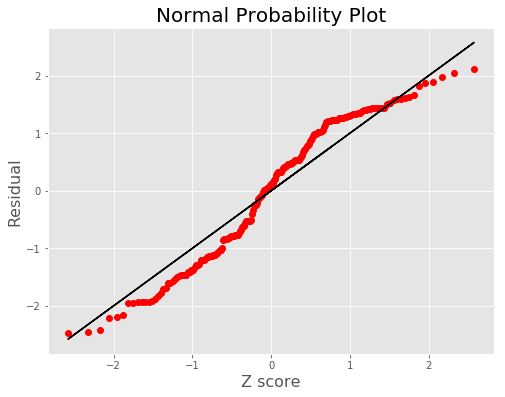

In [19]:
# Normal prob plot
fig = plt.figure(figsize=(8,6))
plt.plot(res_df['Z'], res_df['RESID'], 'ro')
plt.plot(res_df['Z'], res_df['Z'], 'k-')
plt.xlabel('Z score', fontsize=16)
plt.ylabel('Residual', fontsize=16)
plt.title('Normal Probability Plot', fontsize=20)